# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
from datetime import datetime

#Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine cities based on latitude & longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes & longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f'There are {len(cities)} cities in the randomly generated city list.')

There are 588 cities in the randomly generated city list.


### Perform API Calls

In [3]:
# print(cities)

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q="
units = "&units=imperial"

city_names = []
countries = []
cloudiness = []
temps = []
dates = []
humidity = []
lat = []
lng = []          
max_temps = []
wind_speeds = []

record_counter = 0
#Will process in batches of 50
batch_counter = 1
print('Beginning data retrieval:\n--------------------------\n')

for city in cities:
    query_url = base_url + city + units
    response = requests.get(query_url).json()
#     pprint(response)
    
    if record_counter < 50:
        record_counter += 1
        
    else:
        batch_counter += 1
        record_counter = 0
    

    try:
        city_names.append(response['name'])
        countries.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        temps.append(response['main']['temp'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
        print(f'Processing call number {record_counter} of batch #{batch_counter} for {city}' )
        time.sleep(2)
        
    except(KeyError):
        print(f'City not found; skipping ...')
        pass
    
print(f'------------------------\nData retrieval complete.')

Beginning data retrieval:
--------------------------

Processing call number 1 of batch #1 for ponta do sol
Processing call number 2 of batch #1 for atuona
Processing call number 3 of batch #1 for barrow
Processing call number 4 of batch #1 for saint-philippe
City not found; skipping ...
Processing call number 6 of batch #1 for daye
Processing call number 7 of batch #1 for roma
Processing call number 8 of batch #1 for cape town
Processing call number 9 of batch #1 for perugia
Processing call number 10 of batch #1 for ordzhonikidze
Processing call number 11 of batch #1 for rio grande
Processing call number 12 of batch #1 for nikolskoye
Processing call number 13 of batch #1 for malatya
Processing call number 14 of batch #1 for whitianga
Processing call number 15 of batch #1 for mahebourg
Processing call number 16 of batch #1 for vestmannaeyjar
Processing call number 17 of batch #1 for hauterive
Processing call number 18 of batch #1 for ushuaia
Processing call number 19 of batch #1 for er

Processing call number 13 of batch #4 for thompson
Processing call number 14 of batch #4 for kosonsoy
City not found; skipping ...
Processing call number 16 of batch #4 for yondo
Processing call number 17 of batch #4 for san quintin
Processing call number 18 of batch #4 for bahir dar
Processing call number 19 of batch #4 for catamarca
Processing call number 20 of batch #4 for taoudenni
Processing call number 21 of batch #4 for butaritari
Processing call number 22 of batch #4 for san jose
Processing call number 23 of batch #4 for camopi
Processing call number 24 of batch #4 for ancud
Processing call number 25 of batch #4 for hambantota
City not found; skipping ...
City not found; skipping ...
Processing call number 28 of batch #4 for tottori
Processing call number 29 of batch #4 for bose
Processing call number 30 of batch #4 for hami
Processing call number 31 of batch #4 for aswan
Processing call number 32 of batch #4 for dublin
Processing call number 33 of batch #4 for fort walton beac

Processing call number 31 of batch #7 for el sauce
Processing call number 32 of batch #7 for santa marinella
Processing call number 33 of batch #7 for treinta y tres
Processing call number 34 of batch #7 for japura
Processing call number 35 of batch #7 for hede
Processing call number 36 of batch #7 for pacifica
Processing call number 37 of batch #7 for srednekolymsk
Processing call number 38 of batch #7 for baykit
Processing call number 39 of batch #7 for killarney
Processing call number 40 of batch #7 for miri
Processing call number 41 of batch #7 for los alamos
Processing call number 42 of batch #7 for bandarbeyla
Processing call number 43 of batch #7 for champerico
Processing call number 44 of batch #7 for thinadhoo
Processing call number 45 of batch #7 for puerto narino
Processing call number 46 of batch #7 for kourou
Processing call number 47 of batch #7 for mwinilunga
Processing call number 48 of batch #7 for punta alta
Processing call number 49 of batch #7 for zaria
Processing c

Processing call number 40 of batch #10 for andros town
Processing call number 41 of batch #10 for manokwari
Processing call number 42 of batch #10 for pacific grove
Processing call number 43 of batch #10 for monrovia
Processing call number 44 of batch #10 for alexandria
Processing call number 45 of batch #10 for zelenoborsk
Processing call number 46 of batch #10 for xining
City not found; skipping ...
Processing call number 48 of batch #10 for maua
Processing call number 49 of batch #10 for lebedinyy
Processing call number 50 of batch #10 for palmer
Processing call number 0 of batch #11 for jiwani
Processing call number 1 of batch #11 for cherskiy
Processing call number 2 of batch #11 for sisimiut
Processing call number 3 of batch #11 for samarai
Processing call number 4 of batch #11 for vanavara
Processing call number 5 of batch #11 for lavrentiya
Processing call number 6 of batch #11 for dong hoi
Processing call number 7 of batch #11 for semnan
Processing call number 8 of batch #11 f

In [5]:
city_weather = {"City": city_names, "Country": countries, "Cloudiness (%)": cloudiness, "Current Temp (F)": temps,
                "Date": dates, "Humidity": humidity, "Lat": lat, "Long.": lng,
                "Max Temp (F)": max_temps, "Wind Speed (mph)": wind_speeds
               }   

city_weather_df = pd.DataFrame(city_weather)

#Covert timestamp to human-readable date format
city_weather_df['Date'] = pd.to_datetime(city_weather_df['Date'], unit='s')
city_weather_df

,City,Country,Cloudiness (%),Current Temp (F),Date,Humidity,Lat,Long.,Max Temp (F),Wind Speed (mph)
0,Ponta do Sol,PT,96,56.53,2021-01-19 23:16:38,81,32.6667,-17.1000,61.00,12.91
1,Atuona,PF,17,78.24,2021-01-19 23:16:40,73,-9.8000,-139.0333,78.24,11.18
2,Barrow,US,90,-2.20,2021-01-19 23:16:43,78,71.2906,-156.7887,-2.20,21.85
3,Saint-Philippe,RE,0,76.14,2021-01-19 23:16:45,74,-21.3585,55.7679,80.60,2.30
4,Daye,CN,43,45.46,2021-01-19 23:16:48,59,30.0833,114.9500,45.46,6.40
...,...,...,...,...,...,...,...,...,...,...
532,Cayenne,GF,0,75.20,2021-01-19 23:37:15,94,4.9333,-52.3333,75.20,12.82
533,Beaverlodge,CA,75,33.80,2021-01-19 23:39:17,93,55.2166,-119.4361,33.80,40.29
534,Kalāleh,IR,0,46.96,2021-01-19 23:39:20,61,37.3807,55.4916,46.96,1.54
535,Deloraine,AU,0,62.46,2021-01-19 23:39:22,55,-41.5333,146.6667,64.00,5.75


* Export the city data into a .csv.


In [6]:
city_weather_df.to_csv("output_data/cities.csv")

In [7]:
city_weather_df.dtypes

City                        object
Country                     object
Cloudiness (%)               int64
Current Temp (F)           float64
Date                datetime64[ns]
Humidity                     int64
Lat                        float64
Long.                      float64
Max Temp (F)               float64
Wind Speed (mph)           float64
dtype: object

In [8]:
print(len(city_weather_df))

537


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

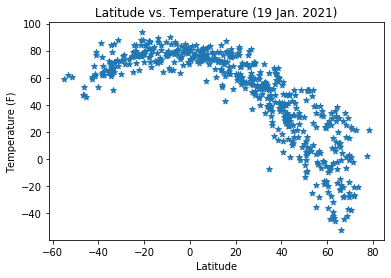

In [78]:
lats = city_weather_df['Lat']
Temp = city_weather_df['Current Temp (F)']
plt.scatter(lats, Temp, marker="*")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs. Temperature (19 Jan. 2021)")
plt.savefig("Plots/LatVTemp.png")

#### Latitude vs. Humidity Plot

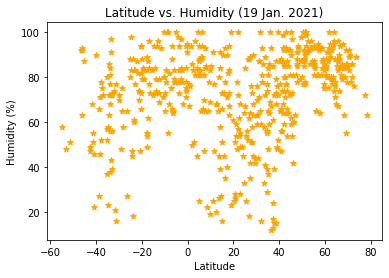

In [79]:
humidity = city_weather_df['Humidity']
plt.scatter(lats, humidity, marker="*", color = "orange")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Latitude vs. Humidity (19 Jan. 2021)')
plt.savefig("Plots/LatVHumidity.png")

#### Latitude vs. Cloudiness Plot

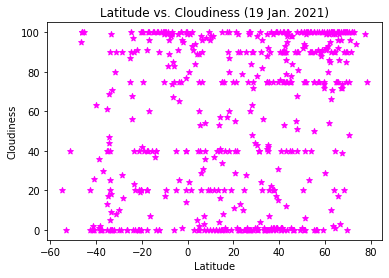

In [80]:
cloudiness = city_weather_df["Cloudiness (%)"]
plt.scatter(lats, cloudiness, marker="*", color='magenta')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('Latitude vs. Cloudiness (19 Jan. 2021)')
plt.savefig("Plots/LatVCloudiness.png")

#### Latitude vs. Wind Speed Plot

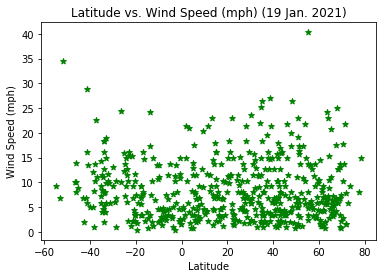

In [81]:
speeds = city_weather_df['Wind Speed (mph)']
plt.scatter(lats, speeds, marker="*", color="g")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph) (19 Jan. 2021)")
plt.savefig("Plots/LatVWindSpeed.png")

Slope = -0.77; intercept = 63.69; rvalue = -0.77; pvalue = 0.0; StD = 0.03.
Correlation is -0.77.


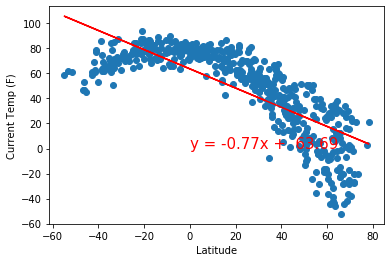

Slope = 0.13; intercept = 70.15; rvalue = 0.22; pvalue = 0.0; StD = 0.03.
Correlation is 0.22.


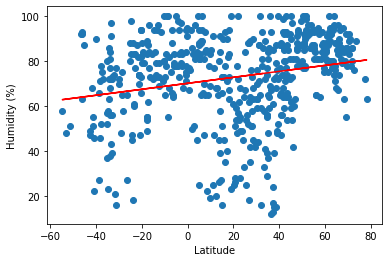

Slope = 0.31; intercept = 47.7; rvalue = 0.27; pvalue = 0.0; StD = 0.05.
Correlation is 0.27.


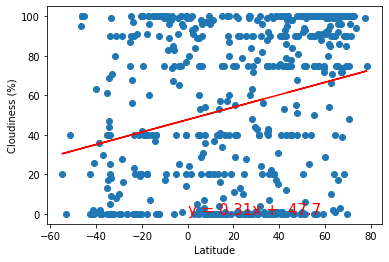

Slope = -0.01; intercept = 8.45; rvalue = -0.03; pvalue = 0.52; StD = 0.01.
Correlation is -0.03.


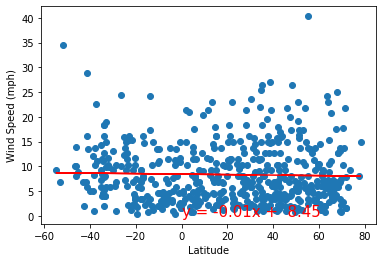

In [67]:
def regress_plot_function(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, (0,0), fontsize = 15, color = 'r')
    correlation = pearsonr(x_values, y_values)
    plt.xlabel("Latitude")
    plt.ylabel(f'{labels[i]}')
    print(f'Correlation is {round(correlation[0], 2)}.')
    plt.show()
    

for i in range(4):
    dims = [temps, humidity, cloudiness, speeds]
    labels = ["Current Temp (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
    x_values = city_weather_df['Lat']
    y_values = dims[i]
    
    regress_plot_function(x_values, y_values) 
       

## Linear Regression

Slope = -0.77; intercept = 63.69; rvalue = -0.77; pvalue = 0.0; StD = 0.03.
Correlation is -0.77.


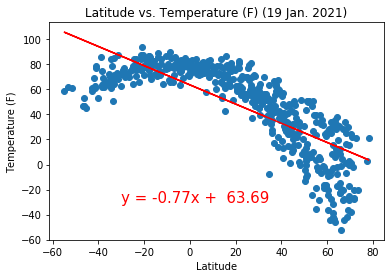

<Figure size 432x288 with 0 Axes>

In [92]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = city_weather_df['Lat']
y_values = city_weather_df['Current Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (-30, -30), fontsize = 15, color = 'r')
correlation = pearsonr(x_values, y_values)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.title("Latitude vs. Temperature (F) (19 Jan. 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
plt.savefig("Plots/WorldTempVLat.png")

In [93]:
# Create Northern and Southern Hemisphere DataFrames
city_north_df = city_weather_df.loc[city_weather_df['Lat'] > 0]
city_north_df.head(15)
print(f'Northern hemisphere dataframe has {len(city_north_df)} rows.')

city_south_df = city_weather_df.loc[city_weather_df['Lat'] <= 0]
city_south_df.head(15)
print(f'Southern hemisphere dataframe has {len(city_south_df)} rows.')

Northern hemisphere dataframe has 378 rows.
Southern hemisphere dataframe has 159 rows.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = -1.41; intercept = 92.07; rvalue = -0.85; pvalue = 0.0; StD = 0.05.
Correlation is -0.85.


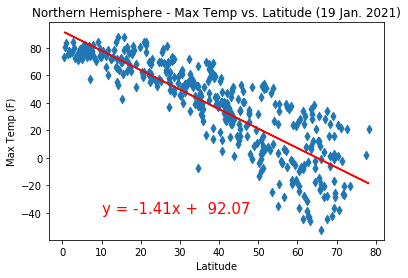

In [94]:
north_lats = city_north_df['Lat']
max_temps_north = city_north_df['Max Temp (F)']
plt.scatter(north_lats, max_temps_north, marker="d")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (19 Jan. 2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lats, max_temps_north)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = north_lats * slope + intercept
correlation = pearsonr(north_lats, max_temps_north)
print(f'Correlation is {round(correlation[0],2)}.')
plt.plot(north_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (10,-40), fontsize = 15, color='r')
plt.savefig("Plots/NrthMaxTempsVLat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = 0.39; intercept = 82.81; rvalue = 0.57; pvalue = 0.0; StD = 0.05.
Correlation is 0.57.


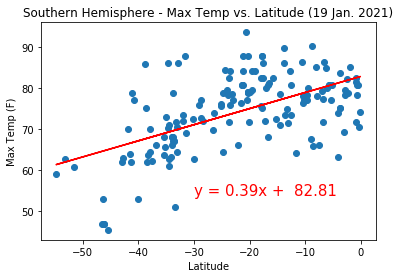

In [84]:
south_lats = city_south_df['Lat']
max_temps_south = city_south_df['Max Temp (F)']
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (19 Jan. 2021)")
plt.scatter(south_lats, max_temps_south)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lats, max_temps_south)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = south_lats * slope + intercept
correlation = pearsonr(south_lats, max_temps_south)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(south_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (-30,54), fontsize = 15, color='r')
plt.savefig("Plots/SthMaxTempVLat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.36; intercept = 59.36; rvalue = 0.35; pvalue = 0.0; StD = 0.05.
Correlation is 0.35.


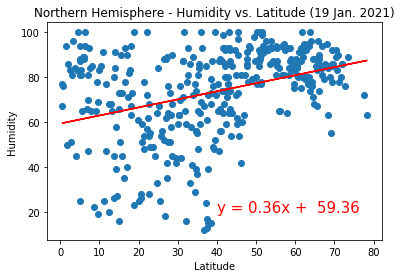

In [85]:
north_humidity = city_north_df['Humidity']
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude (19 Jan. 2021)")
plt.scatter(north_lats, north_humidity)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lats, north_humidity)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = north_lats * slope + intercept
correlation = pearsonr(north_lats, north_humidity)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(north_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (40,20), fontsize = 15, color='r')
plt.savefig("Plots/NrthHumVLat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.57; intercept = 84.56; rvalue = 0.42; pvalue = 0.0; StD = 0.1.
Correlation is 0.42.


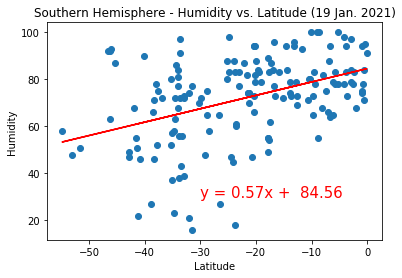

In [86]:
south_humidity = city_south_df['Humidity']
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude (19 Jan. 2021)")
plt.scatter(south_lats, south_humidity)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lats, south_humidity)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = south_lats * slope + intercept
correlation = pearsonr(south_lats, south_humidity)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(south_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (-30,30), fontsize = 15, color='r')
plt.savefig("Plots/SthHumVLat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.65; intercept = 31.72; rvalue = 0.33; pvalue = 0.0; StD = 0.1.
Correlation is 0.33.


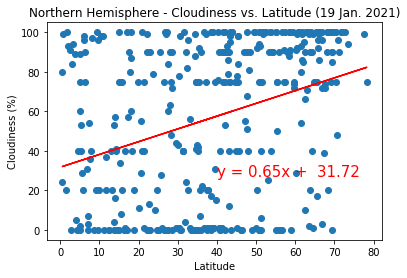

In [87]:
north_cloudiness = city_north_df['Cloudiness (%)']
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (19 Jan. 2021)")
plt.scatter(north_lats, north_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lats, north_cloudiness)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = north_lats * slope + intercept
correlation = pearsonr(north_lats, north_cloudiness)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(north_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (40,27), fontsize = 15, color='r')
plt.savefig("Plots/NthCloudVLat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 1.07; intercept = 71.66; rvalue = 0.36; pvalue = 0.0; StD = 0.22.
Correlation is 0.36.


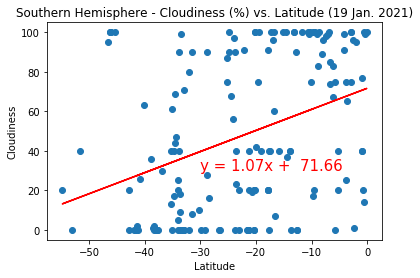

In [88]:
south_cloudiness = city_south_df['Cloudiness (%)']
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (19 Jan. 2021)")
plt.scatter(south_lats, south_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lats, south_cloudiness)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = south_lats * slope + intercept
correlation = pearsonr(south_lats, south_cloudiness)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(south_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (-30,30), fontsize = 15, color='r')
plt.savefig('Plots/SthCloudVLat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = 0.0; intercept = 8.37; rvalue = 0.0; pvalue = 0.98; StD = 0.02.
Correlation is 0.0.


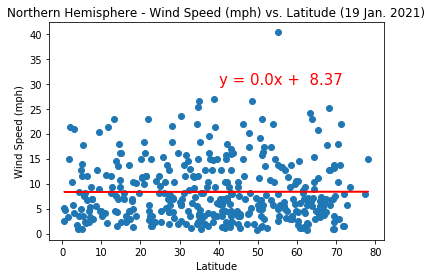

In [89]:
north_winds = city_north_df["Wind Speed (mph)"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (19 Jan. 2021)")
plt.scatter(north_lats, north_winds)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lats, north_winds)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = north_lats * slope + intercept
correlation = pearsonr(north_lats, north_winds)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(north_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (40,30), fontsize = 15, color='r')
plt.savefig("Plots/NrthWindVLat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = -0.14; intercept = 5.28; rvalue = -0.32; pvalue = 0.0; StD = 0.03.
Correlation is -0.32.


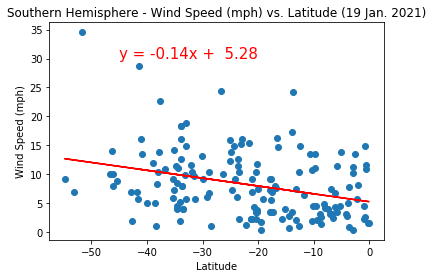

In [90]:
south_winds = city_south_df['Wind Speed (mph)']
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (19 Jan. 2021)")
plt.scatter(south_lats, south_winds)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lats, south_winds)
print(f'Slope = {round(slope, 2)}; intercept = {round(intercept, 2)}; rvalue = {round(rvalue, 2)}; pvalue = {round(pvalue, 2)}; StD = {round(stderr, 2)}.')
regress_values = south_lats * slope + intercept
correlation = pearsonr(south_lats, south_winds)
print(f'Correlation is {round(correlation[0], 2)}.')
plt.plot(south_lats, regress_values, 'r-')
line_eq = "y = " + str(round(slope, 2)) + "x +  " + str(round(intercept, 2))
plt.annotate(line_eq, (-45,30), fontsize = 15, color='r')
plt.savefig("Plots/SthWindSpeedVLat.png")